In [1]:
import pandas as pd
from sqlalchemy import create_engine

In [2]:
engine = create_engine(
    "mssql+pyodbc://MSI\\SQLEXPRESS/project?driver=ODBC+Driver+18+for+SQL+Server&trusted_connection=yes&TrustServerCertificate=yes"
)

In [3]:
pd.read_sql("select * from vendor_sales_summary" ,engine)

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin
0,54,AAPER ALCOHOL & CHEMICAL CO,990,Ethyl Alcohol 200 Proof,105.07,134.49,3750,1,105.07,0.0,0.00,0.00,0.00,0.48,-105.07,0.00
1,60,ADAMBA IMPORTS INTL INC,771,Bak's Krupnik Honey Liqueur,11.44,14.99,750,39,446.16,47.0,704.53,494.67,37.01,367.52,258.37,36.67
2,60,ADAMBA IMPORTS INTL INC,3401,Vesica Vodka,11.10,14.99,1750,6,66.60,0.0,0.00,0.00,0.00,367.52,-66.60,0.00
3,60,ADAMBA IMPORTS INTL INC,3979,Vesica Potato Vodka,16.27,20.99,1750,4687,76257.49,3931.0,66871.69,41682.51,7224.06,367.52,-9385.80,-14.04
4,1703,ALISA CARR BEVERAGES,19124,Ch la Cour d'Argent Bordeaux,23.97,34.99,750,26,623.22,16.0,1119.84,349.95,1.79,172.00,496.62,44.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,90058,ZORVINO VINEYARDS,19557,Zorvino Fragole Z Strawberry,9.39,13.99,750,1787,16779.93,1821.0,25475.79,17963.16,201.60,448.68,8695.86,34.13
10688,90058,ZORVINO VINEYARDS,22297,Zorvino Vyds Pearz,6.75,9.99,750,2101,14181.75,2065.0,20629.35,15734.25,228.12,448.68,6447.60,31.25
10689,90058,ZORVINO VINEYARDS,22298,Zorvino Vyds Sangiovese,8.06,12.49,750,925,7455.50,847.0,10579.03,8018.58,93.58,448.68,3123.53,29.53
10690,90058,ZORVINO VINEYARDS,25125,Zorvino Vyds Mango Magnifico,8.55,12.49,750,1476,12619.80,1299.0,16224.51,13027.07,143.35,448.68,3604.71,22.22


Identify top-performing and underperforming vendors

In [10]:
vendor_summary=vendor_sales_summary.groupby("VendorName").agg({
    "TotalSalesDollars":"sum",
    "GrossProfit": "sum",
     "ProfitMargin": "mean"}).reset_index()



In [9]:
vendor_sales_summary=pd.read_sql("select * from vendor_sales_summary" ,engine)

In [ ]:
print(vendor_summary.head())


In [ ]:
top_vendors=vendor_summary.sort_values(by="GrossProfit" ,ascending=False).head(5)

In [5]:

bottom_vendors=vendor_summary.sort_values(by="GrossProfit" ,ascending=True).head(5)

NameError: name 'vendor_summary' is not defined

In [15]:

print("Top Vendors:\n", top_vendors)
print("Bottom Vendors:\n", bottom_vendors)

Top Vendors:
                      VendorName  TotalSalesDollars  GrossProfit  ProfitMargin
28  DIAGEO NORTH AMERICA INC           68739835.08  17780038.23     22.388359
63        MARTIGNETTI COMPANIES        40905207.44  13083733.53    -37.179349
23  CONSTELLATION BRANDS INC           24467134.22   8893216.32     10.084158
75  PERNOD RICARD USA                  32279544.19   8155452.63     25.787143
50  JIM BEAM BRANDS COMPANY            31898621.26   7695470.21     20.010191
Bottom Vendors:
                                   VendorName  TotalSalesDollars  GrossProfit  \
1                ADAMBA IMPORTS INTL INC               67576.22     -9194.03   
10               BLACK COVE BEVERAGES                   6256.87     -8208.19   
120              VINEYARD BRANDS LLC                    4323.96     -6627.55   
48   IRA GOLDMAN AND WILLIAMS, LLP                      1265.58     -4365.30   
45               HIGHLAND WINE MERCHANTS LLC            1533.68     -3966.64   

     ProfitMargin  


In [16]:
vendor_summary['VendorName'] = vendor_summary['VendorName'].str.strip()


In [6]:
vendor_name=pd.read_sql("select  distinct VendorName from vendor_sales_summary",engine)

In [18]:
print(vendor_name)

                          VendorName
0        AAPER ALCOHOL & CHEMICAL CO
1        ADAMBA IMPORTS INTL INC    
2    ALISA CARR BEVERAGES           
3        ALTAMAR BRANDS LLC         
4        AMERICAN SPIRITS EXCHANGE  
..                               ...
123      WEIN BAUER INC             
124      WESTERN SPIRITS BEVERAGE CO
125      WILLIAM GRANT & SONS INC   
126      WINE GROUP INC             
127      ZORVINO VINEYARDS          

[128 rows x 1 columns]


In [19]:
vendor_sales_summary['VendorName']=vendor_sales_summary['VendorName'].str.strip()

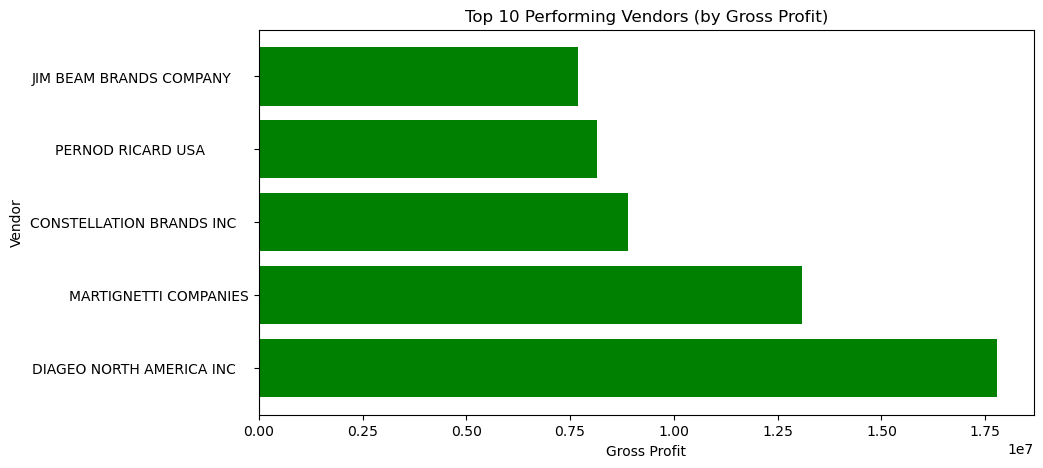

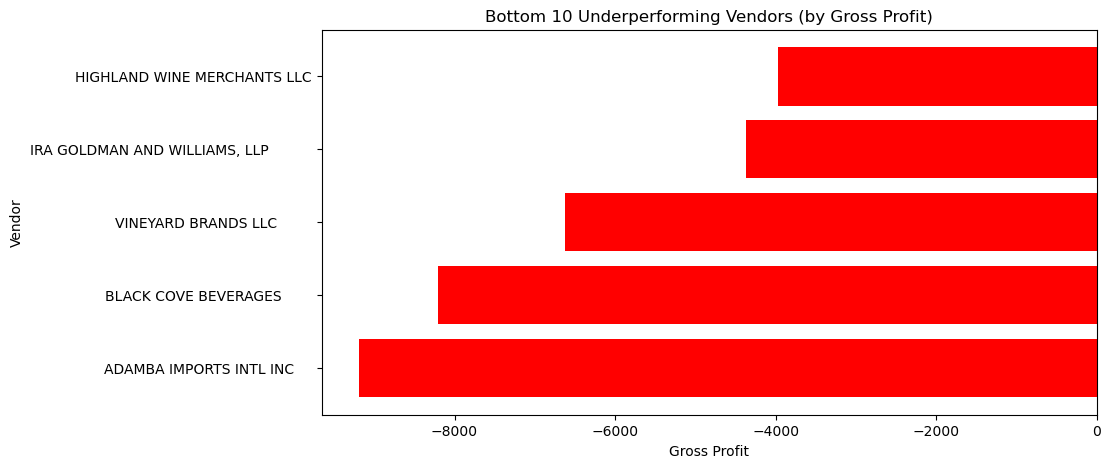

In [20]:
import matplotlib.pyplot as plt

# Top Vendors
plt.figure(figsize=(10,5))
plt.barh(top_vendors["VendorName"], top_vendors["GrossProfit"], color="green")
plt.title("Top 10 Performing Vendors (by Gross Profit)")
plt.xlabel("Gross Profit")
plt.ylabel("Vendor")

plt.show()

# Bottom Vendors
plt.figure(figsize=(10,5))
plt.barh(bottom_vendors["VendorName"], bottom_vendors["GrossProfit"], color="red")
plt.title("Bottom 10 Underperforming Vendors (by Gross Profit)")
plt.xlabel("Gross Profit")
plt.ylabel("Vendor")

plt.show()


In [21]:

bottom_products = vendor_sales_summary[['VendorName','Description','ProfitMargin']].sort_values(by='ProfitMargin').head(5)
print("\nBottom 5 Products by Profit Margin:")
print(bottom_products)



Bottom 5 Products by Profit Margin:
                      VendorName                   Description  ProfitMargin
9048       TREASURY WINE ESTATES    19 Crimes The Banished Red     -23730.64
8217  SOUTHERN WINE & SPIRITS NE  San Polo Brun di Montlcno 11     -19378.60
5341       MARTIGNETTI COMPANIES  Hedges Family Estate Red Mtn     -14902.89
9977  ULTRA BEVERAGE COMPANY LLP        Jos Phelps Insignia 13     -11272.68
8160  SOUTHERN GLAZERS W&S OF NE    Fattoria le Pupille Poggio     -10954.66


In [22]:
top_products = vendor_sales_summary[['VendorName','Description','ProfitMargin']].sort_values(by='ProfitMargin', ascending=False).head(5)
print("Top 5 Products by Profit Margin:")
print(top_products)

Top 5 Products by Profit Margin:
                       VendorName                   Description  ProfitMargin
5773                      MHW LTD    Blue Chair Bay Coconut Rum         99.72
9523   ULTRA BEVERAGE COMPANY LLP  Pezzi King Svgn Bl Dry Creek         99.60
1851  DISARONNO INTERNATIONAL LLC            DiSaronno Amaretto         99.55
2942      JIM BEAM BRANDS COMPANY    Skinnygirl Tangerine Vodka         99.54
6161               PERFECTA WINES       Beniotome Sesame Shochu         99.53


In [23]:
import seaborn as sns

# Assuming your dataset is loaded as df
# Check correlation between GrossProfit and costs
print(vendor_sales_summary[['GrossProfit', 'FreightCost','TotalExciseTax']].corr())

                GrossProfit  FreightCost  TotalExciseTax
GrossProfit        1.000000     0.138095        0.817352
FreightCost        0.138095     1.000000        0.122300
TotalExciseTax     0.817352     0.122300        1.000000


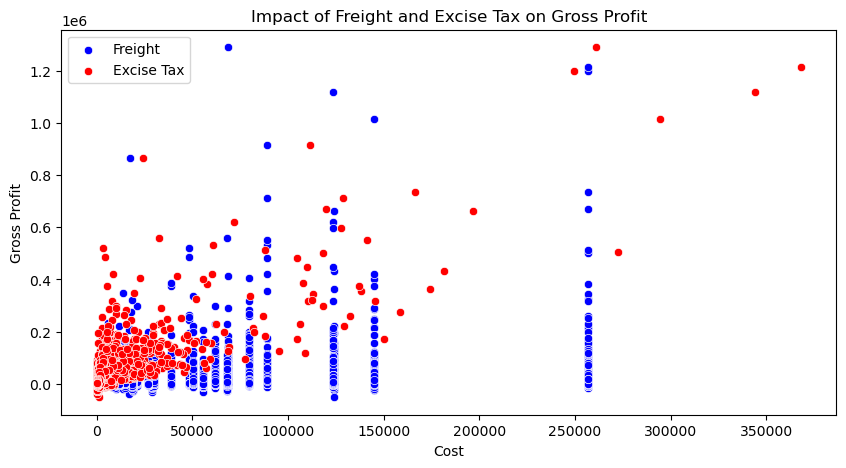

In [24]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='FreightCost', y='GrossProfit', data=vendor_sales_summary, color='blue', label='Freight')
sns.scatterplot(x='TotalExciseTax', y='GrossProfit', data=vendor_sales_summary, color='red', label='Excise Tax')
plt.title('Impact of Freight and Excise Tax on Gross Profit')
plt.xlabel('Cost')
plt.ylabel('Gross Profit')
plt.legend()
plt.show()

Evaluate purchase vs. sales pricing strategies

In [25]:
print(vendor_sales_summary.columns)


Index(['VendorNumber', 'VendorName', 'Brand', 'Description', 'PurchasePrice',
       'ActualPrice', 'Volume', 'TotalPurchaseQuantity',
       'TotalPurchaseDollars', 'TotalSalesQuantity', 'TotalSalesDollars',
       'TotalSalesPrice', 'TotalExciseTax', 'FreightCost', 'GrossProfit',
       'ProfitMargin'],
      dtype='object')


In [26]:
vendor_sales_summary['ProfitMargin'] = ((vendor_sales_summary['TotalSalesPrice'] - vendor_sales_summary['PurchasePrice']) 
                                        / vendor_sales_summary['TotalSalesPrice']) * 100


In [27]:
low_margin = vendor_sales_summary[vendor_sales_summary['ProfitMargin'] < 10]  # Products with <10% margin


In [28]:
low_margin.head(20)

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin
0,54,AAPER ALCOHOL & CHEMICAL CO,990,Ethyl Alcohol 200 Proof,105.07,134.49,3750,1,105.07,0.0,0.0,0.0,0.0,0.48,-105.07,-inf
2,60,ADAMBA IMPORTS INTL INC,3401,Vesica Vodka,11.10,14.99,1750,6,66.60,0.0,0.0,0.0,0.0,367.52,-66.60,-inf
102,480,BACARDI USA INC,4024,Bacardi Razz,0.71,0.99,50,70,49.70,0.0,0.0,0.0,0.0,89286.27,-49.70,-inf
204,516,BANFI PRODUCTS CORP,6940,Bolla Merlot,6.57,9.99,750,12,78.84,0.0,0.0,0.0,0.0,8510.41,-78.84,-inf
482,11567,CAMPARI AMERICA,1124,Manchester Conn Wild Turkey,43.64,54.99,750,12,523.68,0.0,0.0,0.0,0.0,20964.81,-523.68,-inf
595,1650,Circa Wines,5016,Villa Zarri Coffee Brandy,45.03,58.99,750,5,225.15,0.0,0.0,0.0,0.0,211.97,-225.15,-inf
642,1650,Circa Wines,24783,Bagordi Crianza Rioja,12.91,19.49,750,24,309.84,0.0,0.0,0.0,0.0,211.97,-309.84,-inf
648,1650,Circa Wines,26621,Ghostwriter Cab Svgn Bates,37.82,57.49,750,24,907.68,0.0,0.0,0.0,0.0,211.97,-907.68,-inf
671,1392,CONSTELLATION BRANDS INC,1719,Casa Noble Alta Belleza,923.07,1199.99,750,3,2769.21,0.0,0.0,0.0,0.0,79528.99,-2769.21,-inf
803,1392,CONSTELLATION BRANDS INC,11468,Wild Horse Unbridled Chard,13.42,19.99,750,12,161.04,0.0,0.0,0.0,0.0,79528.99,-161.04,-inf


In [29]:
vendor_sales_summary

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin
0,54,AAPER ALCOHOL & CHEMICAL CO,990,Ethyl Alcohol 200 Proof,105.07,134.49,3750,1,105.07,0.0,0.00,0.00,0.00,0.48,-105.07,-inf
1,60,ADAMBA IMPORTS INTL INC,771,Bak's Krupnik Honey Liqueur,11.44,14.99,750,39,446.16,47.0,704.53,494.67,37.01,367.52,258.37,97.687347
2,60,ADAMBA IMPORTS INTL INC,3401,Vesica Vodka,11.10,14.99,1750,6,66.60,0.0,0.00,0.00,0.00,367.52,-66.60,-inf
3,60,ADAMBA IMPORTS INTL INC,3979,Vesica Potato Vodka,16.27,20.99,1750,4687,76257.49,3931.0,66871.69,41682.51,7224.06,367.52,-9385.80,99.960967
4,1703,ALISA CARR BEVERAGES,19124,Ch la Cour d'Argent Bordeaux,23.97,34.99,750,26,623.22,16.0,1119.84,349.95,1.79,172.00,496.62,93.150450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,90058,ZORVINO VINEYARDS,19557,Zorvino Fragole Z Strawberry,9.39,13.99,750,1787,16779.93,1821.0,25475.79,17963.16,201.60,448.68,8695.86,99.947726
10688,90058,ZORVINO VINEYARDS,22297,Zorvino Vyds Pearz,6.75,9.99,750,2101,14181.75,2065.0,20629.35,15734.25,228.12,448.68,6447.60,99.957100
10689,90058,ZORVINO VINEYARDS,22298,Zorvino Vyds Sangiovese,8.06,12.49,750,925,7455.50,847.0,10579.03,8018.58,93.58,448.68,3123.53,99.899483
10690,90058,ZORVINO VINEYARDS,25125,Zorvino Vyds Mango Magnifico,8.55,12.49,750,1476,12619.80,1299.0,16224.51,13027.07,143.35,448.68,3604.71,99.934367


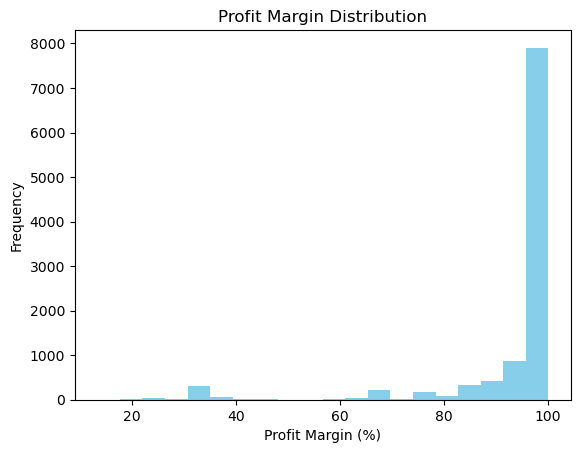

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Remove NaN and infinite values
profit_margin = vendor_sales_summary['ProfitMargin']
profit_margin = profit_margin[np.isfinite(profit_margin)]

plt.hist(profit_margin, bins=20, color='skyblue')
plt.title('Profit Margin Distribution')
plt.xlabel('Profit Margin (%)')
plt.ylabel('Frequency')
plt.show()


In [31]:
low_margin = vendor_sales_summary[(vendor_sales_summary['ProfitMargin'] > 0) & 
                                  (vendor_sales_summary['ProfitMargin'] < 10)]


In [32]:
low_margin_vendors = low_margin.groupby('VendorName')['Description'].count().reset_index()

In [33]:
print(low_margin_vendors)


Empty DataFrame
Columns: [VendorName, Description]
Index: []


Which products have high sales volume but negative or very low profit margin

In [39]:
low_profit_high_sales = vendor_sales_summary[(vendor_sales_summary['ProfitMargin'] <= 5)]
low_profit_high_sales = low_profit_high_sales.sort_values(by='TotalSalesQuantity', ascending=False)
print(low_profit_high_sales[['VendorName','Description','TotalSalesQuantity','ProfitMargin']])


                        VendorName                   Description  \
0      AAPER ALCOHOL & CHEMICAL CO       Ethyl Alcohol 200 Proof   
2          ADAMBA IMPORTS INTL INC                  Vesica Vodka   
102                BACARDI USA INC                  Bacardi Razz   
204            BANFI PRODUCTS CORP                  Bolla Merlot   
482                CAMPARI AMERICA   Manchester Conn Wild Turkey   
...                            ...                           ...   
10317               VINILANDIA USA    DeWetshof Bon Vallon Chard   
10534               WINE GROUP INC  Concannon Selct Petite Sirah   
10603               WINE GROUP INC               Flip Flop Chard   
10640               WINE GROUP INC                 Franzia Chard   
10672               WINE GROUP INC                Fish Eye Chard   

       TotalSalesQuantity  ProfitMargin  
0                     0.0          -inf  
2                     0.0          -inf  
102                   0.0          -inf  
204            

In [37]:
low_profit_high_sales

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin
0,54,AAPER ALCOHOL & CHEMICAL CO,990,Ethyl Alcohol 200 Proof,105.07,134.49,3750,1,105.07,0.0,0.0,0.0,0.0,0.48,-105.07,-inf
2,60,ADAMBA IMPORTS INTL INC,3401,Vesica Vodka,11.10,14.99,1750,6,66.60,0.0,0.0,0.0,0.0,367.52,-66.60,-inf
102,480,BACARDI USA INC,4024,Bacardi Razz,0.71,0.99,50,70,49.70,0.0,0.0,0.0,0.0,89286.27,-49.70,-inf
204,516,BANFI PRODUCTS CORP,6940,Bolla Merlot,6.57,9.99,750,12,78.84,0.0,0.0,0.0,0.0,8510.41,-78.84,-inf
482,11567,CAMPARI AMERICA,1124,Manchester Conn Wild Turkey,43.64,54.99,750,12,523.68,0.0,0.0,0.0,0.0,20964.81,-523.68,-inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10317,90024,VINILANDIA USA,26287,DeWetshof Bon Vallon Chard,12.92,18.99,750,12,155.04,0.0,0.0,0.0,0.0,2802.64,-155.04,-inf
10534,9815,WINE GROUP INC,13875,Concannon Selct Petite Sirah,6.84,9.99,750,1,6.84,0.0,0.0,0.0,0.0,27100.41,-6.84,-inf
10603,9815,WINE GROUP INC,23560,Flip Flop Chard,4.05,5.99,1000,12,48.60,0.0,0.0,0.0,0.0,27100.41,-48.60,-inf
10640,9815,WINE GROUP INC,27901,Franzia Chard,4.79,6.99,1500,6,28.74,0.0,0.0,0.0,0.0,27100.41,-28.74,-inf


In [43]:
low_profit_high_sales = vendor_sales_summary[vendor_sales_summary['ProfitMargin'] <= 5]
low_profit_high_sales = low_profit_high_sales.sort_values(by='TotalSalesQuantity', ascending=False)

# Select top 10 for better visualization (optional)
top_low_margin = low_profit_high_sales.head(5)


In [44]:
print(top_low_margin)

     VendorNumber                   VendorName  Brand  \
0              54  AAPER ALCOHOL & CHEMICAL CO    990   
2              60      ADAMBA IMPORTS INTL INC   3401   
102           480              BACARDI USA INC   4024   
204           516          BANFI PRODUCTS CORP   6940   
482         11567              CAMPARI AMERICA   1124   

                     Description  PurchasePrice  ActualPrice Volume  \
0        Ethyl Alcohol 200 Proof         105.07       134.49   3750   
2                   Vesica Vodka          11.10        14.99   1750   
102                 Bacardi Razz           0.71         0.99     50   
204                 Bolla Merlot           6.57         9.99    750   
482  Manchester Conn Wild Turkey          43.64        54.99    750   

     TotalPurchaseQuantity  TotalPurchaseDollars  TotalSalesQuantity  \
0                        1                105.07                 0.0   
2                        6                 66.60                 0.0   
102           

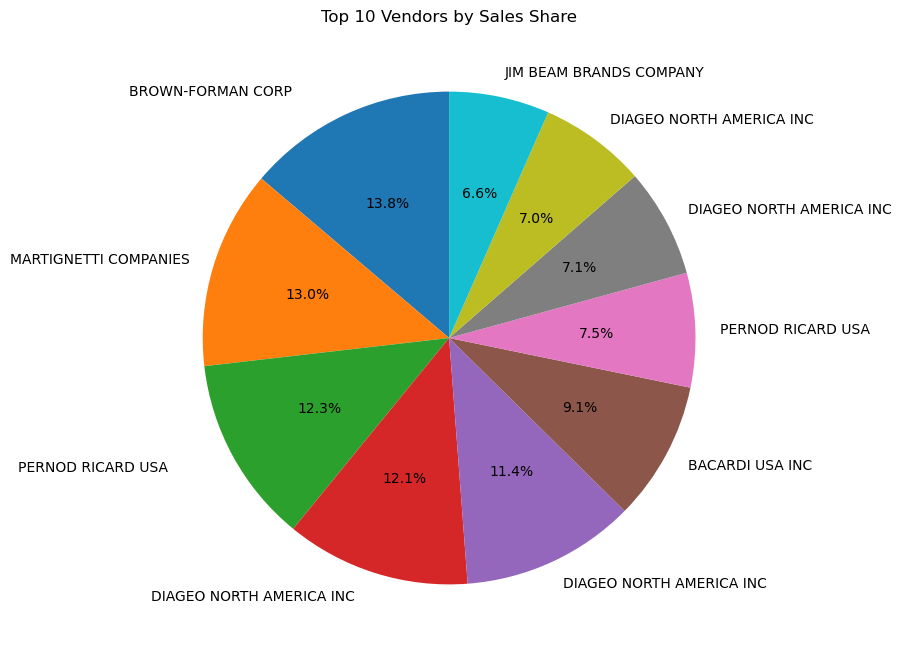

In [12]:
import matplotlib.pyplot as plt

# Take top 10 vendors by sales for readability
top_vendors = vendor_sales_summary.nlargest(10, "TotalSalesDollars")

plt.figure(figsize=(8,8))
plt.pie(
    top_vendors["TotalSalesDollars"], 
    labels=top_vendors["VendorName"], 
    autopct="%1.1f%%", 
    startangle=90
)

plt.title("Top 10 Vendors by Sales Share")
plt.show()


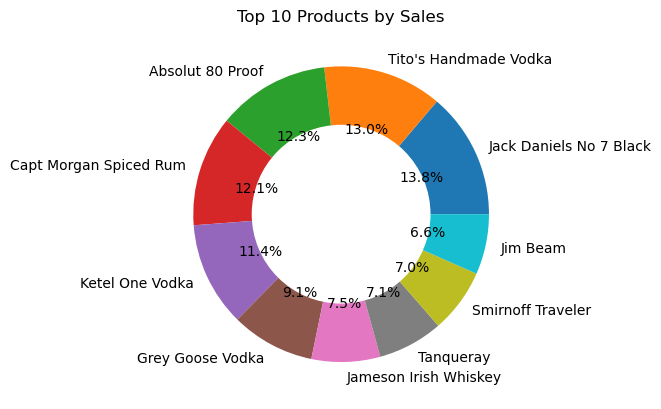

In [14]:
import matplotlib.pyplot as plt

# Top 10 products by sales
top10 = vendor_sales_summary.nlargest(10, "TotalSalesDollars")

# Donut chart
plt.pie(top10["TotalSalesDollars"], labels=top10["Description"], autopct="%1.1f%%")
plt.gca().add_artist(plt.Circle((0,0), 0.6, color="white"))  # make hole
plt.title("Top 10 Products by Sales")
plt.show()


In [15]:
vendor_sales_summary.to_csv("vendor_sales_summary.csv", index=False)


In [16]:
vendor_sales_summary.to_csv(r"C:\Users\nathm\Downloads\vendor_sales_summary.csv", index=False)

print("Files saved to C:\\Users\\nathm\\Downloads")

Files saved to C:\Users\nathm\Downloads
